In [51]:
import pandas as pd
import matplotlib.pyplot as plt


In [52]:
distribution_time = pd.read_csv("data/opnames.csv", delimiter=",")

distribution_time.head(10)

,ref_spec,adm_icu,dis_icu,los_icu,age,gender,nice_ap4_score,icu_death,plan_adm
0,12,2015-10-17 20:22:00,2015-11-03 10:35:00,16.592361,51,F,28,0,0.0
1,12,2015-10-28 23:15:00,2015-11-05 14:46:00,7.646527,54,M,74,0,0.0
2,9,2015-10-30 14:40:00,2015-11-02 14:18:00,2.984722,77,M,63,0,0.0
3,21,2015-10-31 13:24:00,2015-11-16 14:06:00,16.029166,70,F,84,0,0.0
4,12,2015-11-06 01:39:00,2015-11-06 00:08:00,NaN,56,M,49,0,0.0
5,3,2015-11-24 00:21:00,2015-12-03 13:21:00,9.541666,45,M,44,0,0.0
6,12,2015-11-23 17:19:00,2015-12-06 11:41:00,12.765277,34,F,64,1,0.0
7,2,2015-11-30 13:27:00,2015-12-31 16:31:00,31.127777,67,M,94,0,0.0
8,12,2015-11-23 09:39:00,2015-12-12 07:22:00,18.904861,78,F,99,1,0.0
9,41,2015-11-23 07:40:00,2015-11-28 13:45:00,5.253472,59,M,68,0,0.0


In [53]:
distribution_time['adm_icu'] = pd.to_datetime(distribution_time['adm_icu'])


In [54]:
distribution_time['weekday'] = distribution_time['adm_icu'].dt.day_name()

weekday_numbers = distribution_time['weekday'].value_counts().sort_index()

distribution = (weekday_numbers / weekday_numbers.sum()) * 100

print("Aantallen per weekdag:")
print(weekday_numbers)
print("\nDistributie per weekdag (%):")
print(distribution)


Aantallen per weekdag:
weekday
Friday       722
Monday       774
Saturday     408
Sunday       460
Thursday     777
Tuesday      730
Wednesday    679
Name: count, dtype: int64

Distributie per weekdag (%):
weekday
Friday       15.868132
Monday       17.010989
Saturday      8.967033
Sunday       10.109890
Thursday     17.076923
Tuesday      16.043956
Wednesday    14.923077
Name: count, dtype: float64


In [55]:
distribution_time['adm_icu'] = pd.to_datetime(distribution_time['adm_icu'])  

distribution_time['weekday'] = distribution_time['adm_icu'].dt.day_name()

weekday_numbers = distribution_time['weekday'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    ) 


distribution = (weekday_numbers / weekday_numbers.sum()) * 100

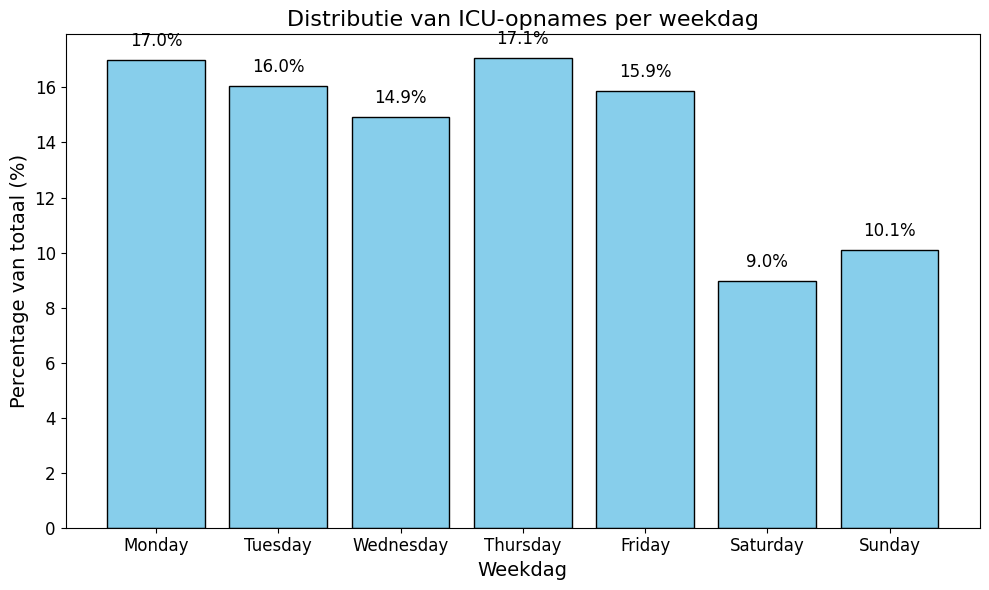

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(weekday_numbers.index, distribution, color='skyblue', edgecolor='black')

plt.title('Distributie van ICU-opnames per weekdag', fontsize=16)
plt.xlabel('Weekdag', fontsize=14)
plt.ylabel('Percentage van totaal (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


for i, v in enumerate(distribution):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=12)

plt.tight_layout()
plt.show()


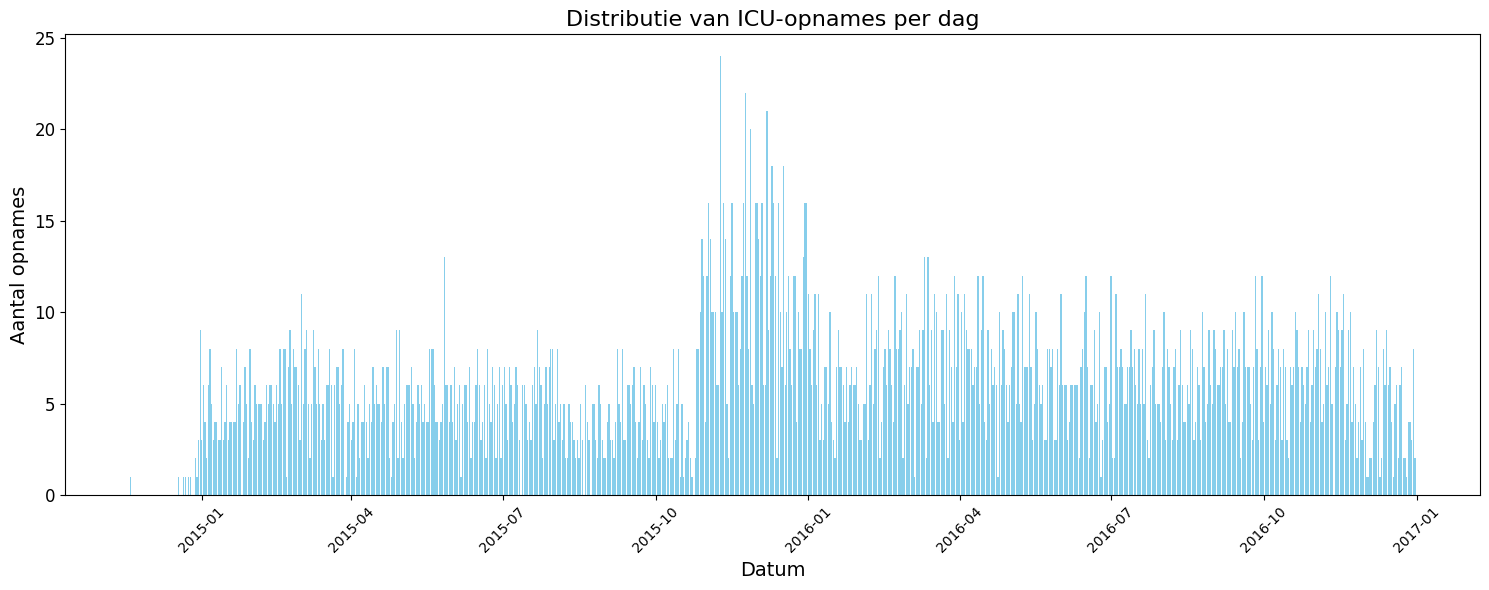

In [57]:
distribution_time['datum'] = distribution_time['adm_icu'].dt.date 
daily_numbers = distribution_time['datum'].value_counts().sort_index()

plt.figure(figsize=(15, 6))
plt.bar(daily_numbers.index, daily_numbers.values, color='skyblue')

plt.title('Distributie van ICU-opnames per dag', fontsize=16)
plt.xlabel('Datum', fontsize=14)
plt.ylabel('Aantal opnames', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=12)

# Plot tonen
plt.tight_layout()
plt.show()
